# Outliers 

## example of outlier test using modified Thompson technique


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.color']='r'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']=20

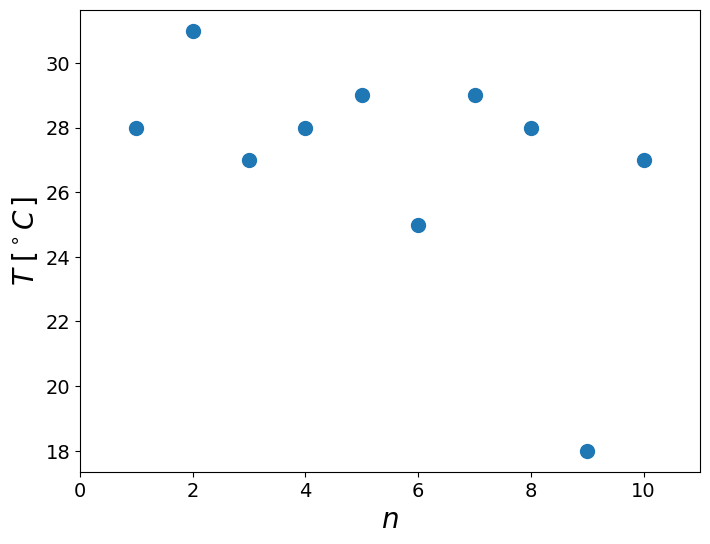

In [2]:
x = np.array([28, 31, 27, 28, 29, 25, 29, 28, 18, 27])
plt.plot(1+np.arange(len(x)),x,'o',markersize=10),
plt.xlim([0,11])
plt.xlabel('$n$')
plt.ylabel('$T\; [^\circ C \,]$');

### is there an outlier? 
Sort, look at the lowest and largest and plot to visualize 

In [3]:
# Sort x
x = np.sort(x)
print(x)

[18 25 27 27 28 28 28 29 29 31]


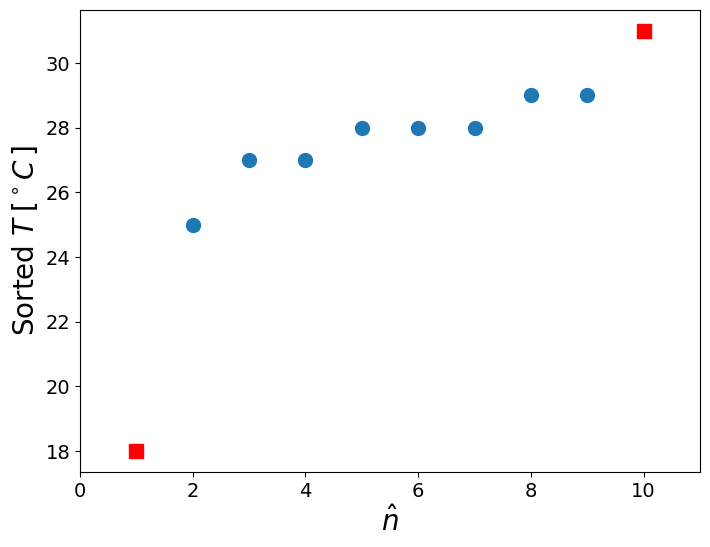

In [4]:
plt.plot(np.arange(2,10),x[1:-1],'o',markersize=10)
plt.plot(1,x[0],'rs',markersize=10,linewidth=2)
plt.plot(10,x[-1],'rs',markersize=10)
plt.xlim([0,11])
plt.xlabel('$\hat{n}$')
plt.ylabel('Sorted $T\; [^\circ C \,]$');

### The sample mean and standard deviation, $\bar{x}$, $S_x$

In [5]:
meanx = np.mean(x)
stdx = np.std(x,ddof=1)
print('mean = %6.2f,  std = %6.2f' % (meanx,stdx))

mean =  27.00,  std =   3.53


### Defivations for each suspicious point, take the largest $\delta_i = |x_i - \bar{x}|$

In [6]:
delta = np.abs(x - meanx)
# print ('suspicious points are with \\delta %.1f %.1f' % (delta[0],delta[-1]))
print ('suspicious point is:',  x[np.argmax(delta)], 'deviation is = %.1f' % np.max(delta))

suspicious point is: 18 deviation is = 9.0


## Modified Thompson technique, $\tau$

Define the confidence level (95%), therefore $\alpha = 5\%$. Because we deal with outliers, the DOF is smaller:

$$ \tau = \frac{t_{\alpha/2} (n-1)}{\sqrt{n} \sqrt{n-2+t_{\alpha/2}^2}}, \qquad \alpha = 0.05, \quad df = n - 2 $$

if: 

$$\delta_i  > \tau S$$ 

then the point is an **outlier**

remove it, estimate **new** $\bar{x}, S, \delta_i$ and **repeat** the test. until there is no outlier in the set.

In [7]:
n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(np.sqrt(n)*np.sqrt(n-2+tv**2))

print ('n = %d, t = %.2f, tau = %.2f' % (n,tv,tau))

print ('compare: %.2f to %.2f ' % (np.max(delta), tau*stdx))
print ('Is max() above $t_{\\nu,95}S$? %s ' % (np.max(delta) > tau*stdx))


n = 10, t = 2.31, tau = 1.80
compare: 9.00 to 6.34 
Is max() above $t_{\nu,95}S$? True 


### So we remove the outlier and repeat the test (from the beginning)

In [8]:
x = np.array([28, 31, 27, 28, 29, 25, 29, 28, 27])
x = np.sort(x)
meanx = np.mean(x)
stdx = np.std(x,ddof=1)
delta = np.abs(x - meanx)
print ('suspicious point is:',  x[np.argmax(delta)], 'deviation is = %.1f' % np.max(delta))
n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(np.sqrt(n)*np.sqrt(n-2+tv**2))

print ('n = %d, t = %.2f, tau = %.2f' % (n,tv,tau))

print ('compare: %.2f to %.2f ' % (np.max(delta), tau*stdx))
print ('Is max() above $t_{\\nu,95}S$? %s ' % (np.max(delta) > tau*stdx))


suspicious point is: 25 deviation is = 3.0
n = 9, t = 2.36, tau = 1.78
compare: 3.00 to 2.95 
Is max() above $t_{\nu,95}S$? True 


In [9]:
x = np.array([28, 31, 27, 28, 29, 29, 28, 27])
x = np.sort(x)
print('Sorted x:'),print(x)
meanx = np.mean(x)
stdx = np.std(x,ddof=1)
delta = np.abs(x - meanx)
print ('suspicious point is:',  x[np.argmax(delta)], 'deviation is = %.1f' % np.max(delta))
n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(np.sqrt(n)*np.sqrt(n-2+tv**2))

print ('n = %d, t = %.2f, tau = %.2f' % (n,tv,tau))

print ('compare: %.2f to %.2f ' % (np.max(delta), tau*stdx))
print ('Is max() above $t_{\\nu,95}S$? %s ' % (np.max(delta) > tau*stdx))

Sorted x:
[27 27 28 28 28 29 29 31]
suspicious point is: 31 deviation is = 2.6
n = 8, t = 2.45, tau = 1.75
compare: 2.62 to 2.28 
Is max() above $t_{\nu,95}S$? True 


In [10]:
x = np.array([28, 27, 28, 29, 29, 28, 27])
x = np.sort(x)
print('Sorted x:'),print(x)
meanx = np.mean(x)
stdx = np.std(x,ddof=1)
delta = np.abs(x - meanx)
print ('suspicious point is:',  x[np.argmax(delta)], 'deviation is = %.1f' % np.max(delta))
n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(np.sqrt(n)*np.sqrt(n-2+tv**2))

print ('n = %d, t = %.2f, tau = %.2f' % (n,tv,tau))

print ('compare: %.2f to %.2f ' % (np.max(delta), tau*stdx))
print ('Is max() above $t_{\\nu,95}S$? %s ' % (np.max(delta) > tau*stdx))

Sorted x:
[27 27 28 28 28 29 29]
suspicious point is: 27 deviation is = 1.0
n = 7, t = 2.57, tau = 1.71
compare: 1.00 to 1.40 
Is max() above $t_{\nu,95}S$? False 
